In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from datetime import timedelta

In [26]:
# Wczytanie i przetwarzanie danych
df = pd.read_csv('dane/AviationData.csv', encoding='ISO-8859-1', dtype={6: str, 7: str, 28: str})
df = df[df['Country'] == 'United States']
df = df[df['Event.Date'] >= '1985-01-01']
# df['Event.Date'] = pd.to_datetime(df['Event.Date'])
# df.set_index('Event.Date', inplace=True)

In [27]:
print(df.columns)


Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')


In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd  # Upewnij się, że masz zaimportowany pandas

# Przygotowanie danych
df['Month'] = df.index.month
df['Year'] = df.index.year
df['DayOfWeek'] = df.index.dayofweek
X = df.drop(columns=['Total.Fatal.Injuries'])
y = df['Total.Fatal.Injuries']

# Usuń kolumny zawierające dane stringowe
X = X.select_dtypes(exclude=['object'])

# Zastosuj one-hot encoding do zmiennych kategorialnych
X = pd.get_dummies(X, drop_first=True)

# Wypełnij brakujące wartości
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)  # Dodano wypełnianie brakujących wartości w y

# Podział na zbiory treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Upewnij się, że X_train i X_test mają tę samą liczbę kolumn po transformacji
missing_cols = set(X_train.columns) - set(X_test.columns)
for c in missing_cols:
    X_test[c] = 0
X_test = X_test[X_train.columns]

# Wypełnij brakujące wartości w y_train i y_test
y_train.fillna(y_train.mean(), inplace=True)  # Dodano wypełnianie brakujących wartości w y_train
y_test.fillna(y_test.mean(), inplace=True)    # Dodano wypełnianie brakujących wartości w y_test

# Utworzenie i dopasowanie modelu
model_rf = RandomForestRegressor(n_estimators=100, random_state=0)
model_rf.fit(X_train, y_train)

# Prognozowanie i ocena modelu
y_pred = model_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 2.343118068824977


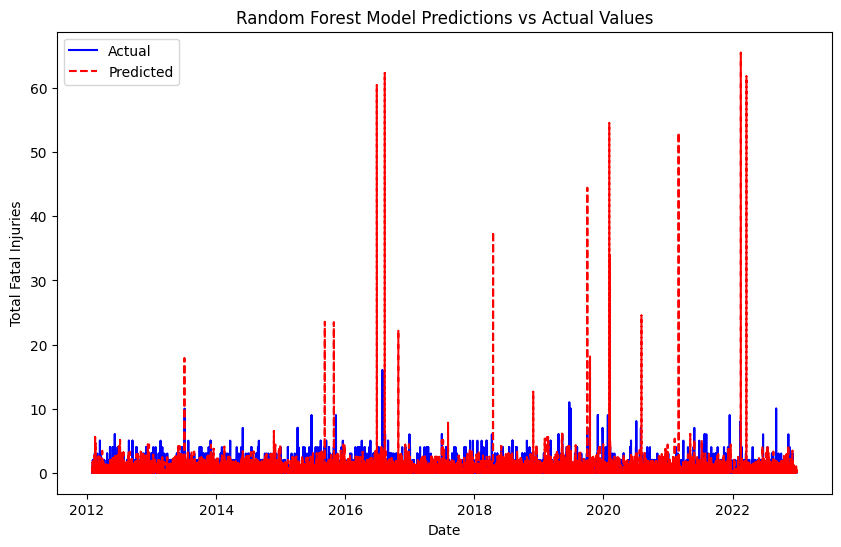

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# Rysowanie wartości rzeczywistych
plt.plot(y_test.index, y_test, label='Actual', color='blue')

# Rysowanie przewidywań modelu
plt.plot(y_test.index, y_pred, label='Predicted', color='red', linestyle='dashed')

plt.xlabel('Date')
plt.ylabel('Total Fatal Injuries')
plt.title('Random Forest Model Predictions vs Actual Values')
plt.legend()
plt.show()


In [10]:
feature_importance = model_rf.feature_importances_
features = X_train.columns
feature_df = pd.DataFrame({'Features': features, 'Importance': feature_importance})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

print(feature_df)


                 Features  Importance
1  Total.Serious.Injuries    0.213875
5                    Year    0.192803
4                   Month    0.188056
6               DayOfWeek    0.173130
0       Number.of.Engines    0.105001
2    Total.Minor.Injuries    0.081073
3         Total.Uninjured    0.046061


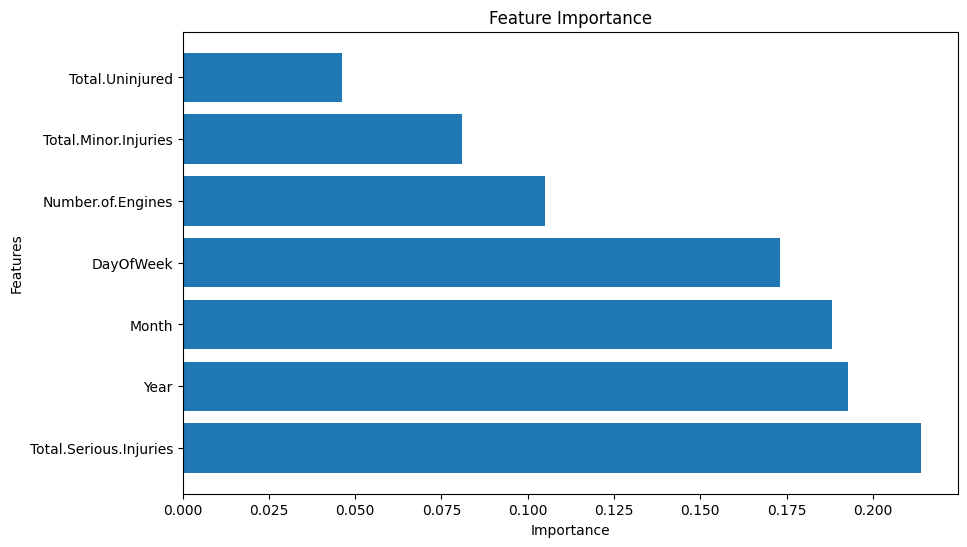

In [11]:
plt.figure(figsize=(10,6))
plt.barh(feature_df['Features'], feature_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()


In [41]:
# Wczytanie i przetwarzanie danych
df = pd.read_csv('dane/AviationData.csv', encoding='ISO-8859-1', dtype={6: str, 7: str, 28: str})
df = df[df['Country'] == 'United States']
df = df[df['Event.Date'] >= '1985-01-01']
df['Event.Date'] = pd.to_datetime(df['Event.Date'])
df.set_index('Event.Date', inplace=True)

In [42]:
print(df.head())


                  Event.Id Investigation.Type Accident.Number  \
Event.Date                                                      
1985-01-01  20001214X35598           Accident      NYC85FNC02   
1985-01-01  20001214X35495           Accident      DEN85FA055   
1985-01-01  20001214X35566           Accident      MIA85FA071   
1985-01-01  20001214X35463           Accident      ATL85LA075   
1985-01-02  20001214X35584           Accident      MKC85FA042   

                   Location        Country Latitude Longitude Airport.Code  \
Event.Date                                                                   
1985-01-01    HOPKINTON, NH  United States      NaN       NaN          LEB   
1985-01-01     EDGEWOOD, NM  United States      NaN       NaN          NaN   
1985-01-01       ODESSA, FL  United States      NaN       NaN          NaN   
1985-01-01       DUBLIN, NC  United States      NaN       NaN          NaN   
1985-01-02  PAWNEE CITY, NE  United States      NaN       NaN          NaN  

In [51]:
# Usuń wiersze, gdzie kolumna docelowa ma brakujące wartości
df.dropna(subset=['Total.Fatal.Injuries'], inplace=True) 


In [53]:
# Usuwanie wierszy z NaN w określonych kolumnach
data_cleaned = df.dropna(subset=['Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition', 'Broad.phase.of.flight'])

numerical_features = ['Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
categorical_features = ['Weather.Condition', 'Broad.phase.of.flight']

In [58]:
data_cleaned = df.dropna(subset=['Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition', 'Broad.phase.of.flight'])



In [59]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for feature in categorical_features:
    df[feature] = le.fit_transform(df[feature].astype(str))


In [60]:
from sklearn.model_selection import train_test_split

# Wybór kolumn do trenowania modelu
features = numerical_features + categorical_features
X = df[features]
y = df['Total.Fatal.Injuries']

# Podział danych na treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [62]:
data_cleaned = df.dropna(subset=['Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition', 'Broad.phase.of.flight'])



In [65]:
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])


Location                      6
Latitude                  37933
Longitude                 37933
Airport.Code              24363
Airport.Name              23127
Injury.Severity             108
Aircraft.damage            1451
Aircraft.Category         39982
Registration.Number          14
Make                         13
Model                        16
Amateur.Built                 8
Number.of.Engines          1621
Engine.Type                2681
FAR.Description           39912
Schedule                  53533
Purpose.of.flight          1545
Air.carrier               47497
Total.Serious.Injuries     2156
Total.Minor.Injuries       2354
Total.Uninjured            2385
Report.Status              2611
Publication.Date           5772
dtype: int64


In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Wczytaj dane
data = pd.read_csv('twoj_plik.csv')  # Zastąp 'twoj_plik.csv' ścieżką do swojego pliku CSV

# Przetwarzanie brakujących danych
data.fillna({'Location': 'Unknown', 'Latitude': data['Latitude'].median(), 'Longitude': data['Longitude'].median(),
             'Airport.Code': 'Unknown', 'Airport.Name': 'Unknown', 'Injury.Severity': 'Unknown',
             'Aircraft.damage': 'Unknown', 'Aircraft.Category': 'Unknown', 'Registration.Number': 'Unknown',
             'Make': 'Unknown', 'Model': 'Unknown', 'Amateur.Built': 'Unknown',
             'Number.of.Engines': data['Number.of.Engines'].median(), 'Engine.Type': 'Unknown',
             'FAR.Description': 'Unknown', 'Schedule': 'Unknown', 'Purpose.of.flight': 'Unknown',
             'Air.carrier': 'Unknown', 'Total.Serious.Injuries': 0, 'Total.Minor.Injuries': 0,
             'Total.Uninjured': 0, 'Report.Status': 'Unknown', 'Publication.Date': 'Unknown'}, inplace=True)

# Zakodowanie kategorialnych zmiennych
label_encoder = LabelEncoder()
categorical_columns = ['Location', 'Airport.Code', 'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
                       'Aircraft.Category', 'Registration.Number', 'Make', 'Model', 'Amateur.Built',
                       'Engine.Type', 'FAR.Description', 'Schedule', 'Purpose.of.flight', 'Air.carrier',
                       'Report.Status', 'Publication.Date']

for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Rozdziel zbiór na cechy (X) i docelowe wartości (y)
X = data.drop('Your_Target_Column_Name', axis=1)  # Zastąp 'Your_Target_Column_Name' nazwą kolumny docelowej
y = data['Your_Target_Column_Name']

# Podział zbioru na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Utwórz instancję modelu RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=0)

# Trenowanie modelu na danych treningowych
model_rf.fit(X_train, y_train)

# Prognozowanie na zbiorze testowym
y_pred = model_rf.predict(X_test)

# Ocena modelu
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Wyświetl znaczenie cech (opcjonalne)
feature_importances = pd.DataFrame({'Features': X.columns, 'Importance': model_rf.feature_importances_})
print(feature_importances)

# Teraz możesz użyć tego modelu do prognozowania na nowych danych


FileNotFoundError: [Errno 2] No such file or directory: 'twoj_plik.csv'

In [63]:
from sklearn.ensemble import RandomForestRegressor

# Utworzenie modelu
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Trenowanie modelu
model_rf.fit(X_train, y_train)


ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
from sklearn.metrics import mean_squared_error

# Prognozowanie dla zbioru testowego
y_pred = model_rf.predict(X_test)

# Ocena modelu
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


In [43]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Ładowanie Danych
df = pd.read_csv('dane/AviationData.csv', encoding='ISO-8859-1', dtype={6: str, 7: str, 28: str})

# Filtracja Danych
df = df[df['Country'] == 'United States']
df = df[df['Event.Date'] >= '1985-01-01']
df.dropna(subset=['Total.Fatal.Injuries'], inplace=True)  # Usunięcie wierszy, gdzie kolumna docelowa ma brakujące wartości

# Wybór cech numerycznych i kategorycznych
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = ['Broad.phase.of.flight']

# Kodowanie zmiennych kategorycznych
le = LabelEncoder()
for feature in categorical_features:
    if feature in df.columns:
        df[feature] = le.fit_transform(df[feature].astype(str))

# Selekcja cech
features = numerical_features + categorical_features
X = df[features]
y = df['Total.Fatal.Injuries']

# Podział na zbiory treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Utworzenie i dopasowanie modelu
model_rf = RandomForestRegressor(n_estimators=100, random_state=0)
model_rf.fit(X_train, y_train)

# Prognozowanie i ocena modelu
y_pred = model_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values